In [1]:
import tdt
import glob
import os
import pathlib
import re

from med_associates_utils.session import SessionCollection, MPCSession

from med_associates_utils.viz import plot_cumulative_events, plot_event_raster

In [2]:

all_sessions = SessionCollection()
for path in glob.glob(r'M:\2024 July,Aug GRABDA2m data (DLS C1906Y)/misc/RI30-240715-091011/EN*'):
    data = tdt.read_block(path, evtype=['epocs'])
    #print(path, data)
    #print(data.epocs.keys())
    session = MPCSession()
    session.metadata.update(data.info.items())

    base = os.path.basename(path)
    session.metadata['animal'] = base.split('_')[0]
    session.metadata['day'] = re.search("RI[36]0([DR].+?)-", base)[1]

    for k in data.epocs.keys():
        session.arrays[k] = data.epocs[k].onset

    all_sessions.append(session)
    

all_sessions.describe()
all_sessions[0].describe()

read from t=0s to t=1799.2s
read from t=0s to t=1798.97s
read from t=0s to t=1799.19s
read from t=0s to t=1799.21s
read from t=0s to t=1799.09s
read from t=0s to t=1799.19s
read from t=0s to t=1849.54s
read from t=0s to t=1799.3s
read from t=0s to t=1799.19s
read from t=0s to t=1799.2s
read from t=0s to t=1799.2s
read from t=0s to t=1799.11s
read from t=0s to t=1799.1s
read from t=0s to t=1799.1s
read from t=0s to t=1799.09s
read from t=0s to t=1799.1s
read from t=0s to t=1799.09s
read from t=0s to t=1799.2s
read from t=0s to t=1799.21s
read from t=0s to t=1799.31s
read from t=0s to t=1799.1s
read from t=0s to t=1799.11s
read from t=0s to t=1799.06s
read from t=0s to t=1799.11s
read from t=0s to t=1799.11s
read from t=0s to t=1799.1s
read from t=0s to t=1798.97s
Number of sessions: 27

Arrays present in data with counts:
(27) "Cam1"
(27) "P1SC"
(27) "UnNP"
(26) "RMG_"
(27) "URM_"
(26) "RNP_"
(27) "Nose"
(27) "Tick"

Scalars present in data with counts:


Metadata:
    tankpath: M:\2024

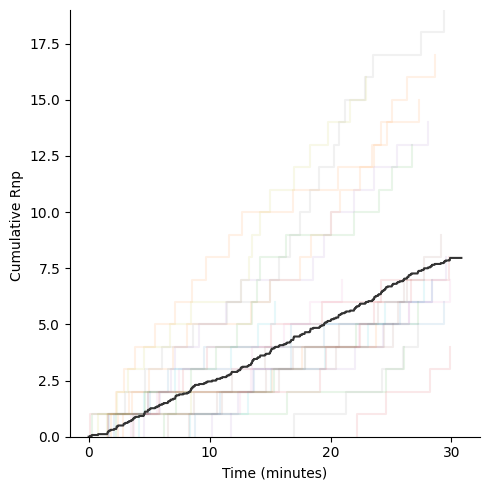

In [3]:
event_df = all_sessions.to_dataframe(include_meta=['day', 'animal'])
result = plot_cumulative_events(event_df, event='RNP_', individual=['animal', 'day'], hue=None)

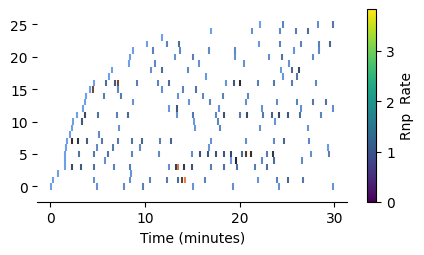

In [4]:
result = plot_event_raster(event_df, event='RNP_', individual=['animal', 'day'])